In [ ]:
#Medición del tiempo de inicio
import time

# Registrar el tiempo actual en el momento del inicio
inicio = time.time()

# Carga de Paquetes y Librerias

In [ ]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
from numpy import array
import datetime as dt           # Permite trabajar con fechas

# Machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


# Reducción de dimensiones
from sklearn.decomposition import PCA

# Regresión lineal
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Pretty print
from pprint import pprint

#SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Google
from google.colab import files  # Permite descargar archivos directamente desde Colab

# Instalar la biblioteca deepsig si no está instalada
!pip install deepsig

# Importar las funciones necesarias de deepsig
from deepsig import aso
from deepsig import multi_aso
from deepsig import bootstrap_power_analysis

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )

# Mostrar advertencia personalizada
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

# Carga de Base de Datos

In [ ]:
# Cargar datos de demanda energética comercial en Colombia desde Google Drive (acceso libre)

# Código de identificación del archivo en Google Drive
FILEID = "1y8yY85w4Eyr_LCmoKO7c31BZ7gEWfAMN"  # Copiar el código desde el enlace generado en Google Drive

# Descargar el archivo utilizando wget y gestionar las cookies temporales
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Score.zip && rm -rf /tmp/cookies.txt

# Descomprimir el archivo descargado en el directorio principal de Colab
!unzip Score.zip

# Mostrar el contenido del directorio actual
!dir

--2023-07-30 21:35:56--  https://docs.google.com/uc?export=download&confirm=&id=1y8yY85w4Eyr_LCmoKO7c31BZ7gEWfAMN
Resolving docs.google.com (docs.google.com)... 172.253.118.138, 172.253.118.139, 172.253.118.100, ...
Connecting to docs.google.com (docs.google.com)|172.253.118.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s32nqnhhulvhb5ehqcvj3ntfslrkneoo/1690752900000/15940467605774616319/*/1y8yY85w4Eyr_LCmoKO7c31BZ7gEWfAMN?e=download&uuid=1a0074eb-d0b9-4ac9-88dd-663bfdea8b67 [following]
--2023-07-30 21:35:56--  https://doc-08-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s32nqnhhulvhb5ehqcvj3ntfslrkneoo/1690752900000/15940467605774616319/*/1y8yY85w4Eyr_LCmoKO7c31BZ7gEWfAMN?e=download&uuid=1a0074eb-d0b9-4ac9-88dd-663bfdea8b67
Resolving doc-08-6k-docs.googleusercontent.com (doc-08-6k-docs.googleusercontent.com)... 74.125.24.132

In [ ]:
# Leer el archivo Excel y cargar los datos en un DataFrame
df = pd.read_excel('/content/R2_Score.xlsx')

# Rellenar los valores faltantes con el promedio de cada columna
df.fillna(df.mean(), inplace=True)

# Obtener los nombres de las columnas del DataFrame
column_names = df.columns

Index(['SVR', 'OLS', 'RNN U 36', 'MPL U 30', 'RNN M 36S', 'LSTM M 18',
       'GRU M 18S'],
      dtype='object')

<Axes: xlabel='Grup', ylabel='R2'>

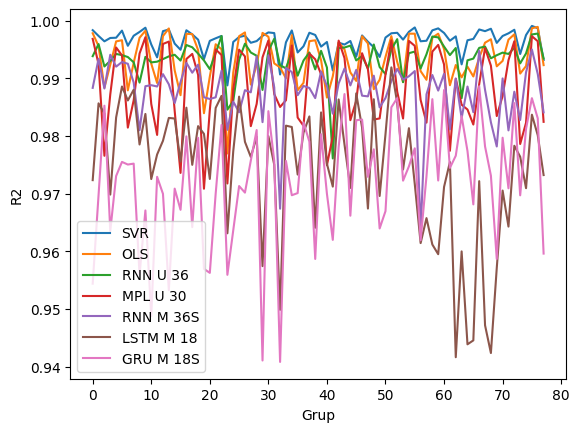

In [ ]:
# Graficar las columnas de R2 en el DataFrame
df.plot(ylabel='R2', xlabel='Grupo')

In [ ]:
# Asignar columnas específicas del DataFrame a variables individuales
SVR = df['SVR']
OLS = df['OLS']
RNN_UV = df['RNN U 36']
MPL = df['MPL U 30']
RNN_MV = df['RNN M 36S']
LSTM = df['LSTM M 18']
GRU = df['GRU M 18S']

# Realizar análisis de potencia Bootstrap
power = bootstrap_power_analysis(SVR, show_progress=False)  # 0.081, demasiado bajo
print(power)

1.0


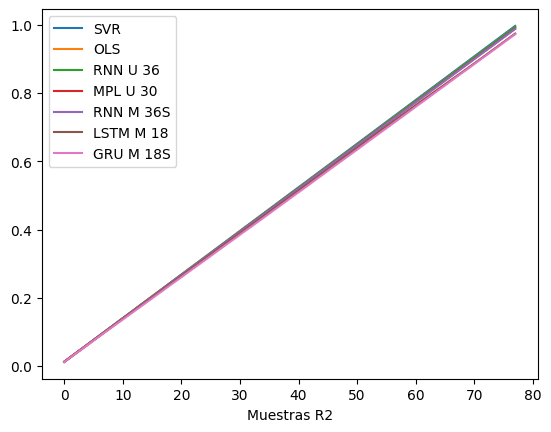

In [ ]:
# Calcular la función de distribución acumulativa (CDF)

# Calcular la suma acumulativa de los valores en 'df' y dividir por la longitud del arreglo
cdf = np.cumsum(df) / len(df)

# Graficar la función de distribución acumulativa (CDF)
plt.plot(cdf, label=df.columns)  # Graficar la CDF usando los valores calculados
plt.xlabel('Muestras R2')  # Etiqueta del eje x
plt.legend()  # Mostrar la leyenda basada en los nombres de las columnas de 'df'
plt.show()  # Mostrar la gráfica

In [ ]:
# Configuración de la semilla para generar números pseudoaleatorios
seed = 42

# Se asume que 'SVR' y 'GRU' son arreglos o estructuras de datos que contienen valores numéricos

# Llamada a una función 'aso' con los valores de 'SVR' y 'GRU', y utilizando la semilla definida
min_eps = aso(SVR.values, GRU.values, seed=seed)

# Imprimir el valor calculado de 'min_eps'
print(min_eps)

Bootstrap iterations: 100%|█████████▉| 999/1000 [00:11<00:00, 85.65it/s]

0.0


In [ ]:
# Asignación de la matriz 'values' de 'df' a la variable 'Valores'
Valores = df.values

# Transposición de la matriz 'Valores', almacenando el resultado en 'ValoresT'
ValoresT = Valores.T

# Llamada a la función 'multi_aso' con la matriz transpuesta 'ValoresT'
eps_min = multi_aso(ValoresT, confidence_level=0.95, seed=seed)

Model comparisons: 100%|█████████▉| 20979/21000 [03:17<00:00, 106.43it/s]


In [ ]:
# Crear un DataFrame a partir de la matriz 'eps_min'
DF_eps_min = pd.DataFrame(eps_min, columns=df.columns)

# Establecer los nombres de las columnas del DataFrame como índices
DF_eps_min.set_index(df.columns, inplace=True)

# Imprimir el DataFrame resultante
print(DF_eps_min)

,SVR,OLS,RNN U 36,MPL U 30,RNN M 36S,LSTM M 18,GRU M 18S
SVR,1.0,0.000171,0.000469,0.000000,0.000000,0.000000e+00,0.000000
OLS,1.0,1.000000,0.930538,0.002656,0.006195,0.000000e+00,0.000000
RNN U 36,1.0,0.876718,1.000000,0.003676,0.008895,0.000000e+00,0.000000
MPL U 30,1.0,1.000000,1.000000,1.000000,0.707065,0.000000e+00,0.000000
RNN M 36S,1.0,1.000000,1.000000,1.000000,1.000000,2.338927e-07,0.000000
LSTM M 18,1.0,1.000000,1.000000,1.000000,1.000000,1.000000e+00,0.741635
GRU M 18S,1.0,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000


In [ ]:
# Nombre del archivo Excel en el que se guardará el DataFrame
nombre_archivo = 'Result_ASO_R2.xlsx'

# Guardar el DataFrame 'DF_eps_min' en un archivo Excel
DF_eps_min.to_excel(nombre_archivo, index=True)

# tiempo

In [ ]:
# Cálculo del tiempo transcurrido

# Registrar el tiempo de finalización
fin = time.time()

# Calcular el tiempo transcurrido
tiempo_transcurrido = fin - inicio

# Imprimir el tiempo transcurrido en segundos
print("Tiempo transcurrido: ", tiempo_transcurrido, "segundos")

Tiempo transcurrido:  229.24892592430115 segundos
